In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


### Import Data & Apply K-Means

In [2]:
scooter_june_pride = pd.read_csv('../data/small_scooter.csv')
scooter_june_pride.drop(columns='Unnamed: 0', inplace=True)
scooter_june_pride['Start_Time'] = pd.to_datetime(scooter_june_pride['Start_Time'])
scooter_june_pride['End_Time'] = pd.to_datetime(scooter_june_pride['End_Time'])

In [ ]:
start_locations = scooter_june_pride[['Start_Centroid_Latitude', 'Start_Centroid_Longitude']]
scooter_june_pride['Start_Location'] = start_locations.values.tolist()
end_locations = scooter_june_pride[['Start_Centroid_Latitude', 'Start_Centroid_Longitude']]
scooter_june_pride['End_Location'] = end_locations.values.tolist()

In [3]:
# scooter_june_pride['Day_of_Week_Int'] = scooter_june_pride['Start_Time'].dt.weekday
scooter_june_pride['Time_of_Day'] = scooter_june_pride['Start_Time'].dt.hour
scooter_june_pride['Day_of_Week'] = scooter_june_pride['Start_Time'].dt.weekday #day_name()
scooter_june_pride.head()

,Trip_ID,Start_Time,End_Time,Trip_Distance,Trip_Duration,Accuracy,Start_Centroid_Latitude,Start_Centroid_Longitude,End_Centroid_Latitude,End_Centroid_Longitude,Day_of_Week,Time_of_Day
0,11d42b99-e839-346c-11d4-2b99e839346c,2019-06-24 19:00:00,2019-06-24 19:00:00,0.569919,5.983333,10,41.894101,-87.763112,41.894101,-87.763112,0,19
1,c46c5b1f-d7a1-5c11-96b6-bb8bfa2d4fa3,2019-06-21 18:00:00,2019-06-21 19:00:00,0.469857,46.833333,0,41.953582,-87.723452,41.953582,-87.723452,4,18
2,3ad30b66-b615-404b-ada2-92cfb30dd32b,2019-06-21 21:00:00,2019-06-21 21:00:00,0.824736,4.000000,152,41.953582,-87.723452,41.953582,-87.723452,4,21
3,8574e87e-d881-4468-bf79-f7e62f268f4d,2019-06-21 18:00:00,2019-06-21 19:00:00,1.694842,22.416667,10,41.953582,-87.723452,41.953582,-87.723452,4,18
4,9b79b345-1492-40f4-85a6-fee83c5a6ffc,2019-06-26 18:00:00,2019-06-26 18:00:00,0.991920,5.316667,152,41.953582,-87.723452,41.953582,-87.723452,2,18


In [4]:
start_locations = scooter_june_pride[['Start_Centroid_Latitude', 'Start_Centroid_Longitude']]
start_location_array = start_locations.to_numpy()
start_location_array

array([[ 41.8941013 , -87.76311182],
       [ 41.95358182, -87.72345248],
       [ 41.95358182, -87.72345248],
       ...,
       [ 41.90602339, -87.67531026],
       [ 41.90837594, -87.67093749],
       [ 41.90120673, -87.67635713]])

In [5]:
kmeans = KMeans()
kmeans.fit(start_location_array)

KMeans()

#### print centroids

In [ ]:
print("\n2) cluster centers:")
print(kmeans.cluster_centers_)

### Scatter Plot of Start Locations

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(start_location_array[:,0], start_location_array[:,1]);

In [6]:
end_locations = scooter_june_pride[['End_Centroid_Latitude', 'End_Centroid_Longitude']]
end_location_array = end_locations.to_numpy()
end_location_array.shape

(58009, 2)

In [7]:
kmeans_end = KMeans()
kmeans_end.fit(end_location_array)

KMeans()

In [ ]:
print("\n2) cluster centers:")
print(kmeans_end.cluster_centers_)

In [ ]:
kmeans.fit(start_location_array)

In [ ]:
print("\n2) cluster centers:")
print(kmeans.cluster_centers_)

In [ ]:
kmeans_end.fit(end_location_array)

In [ ]:
print("\n2) cluster centers:")
print(kmeans_end.cluster_centers_)

### Scatter Plot of Start + End Locations

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(end_location_array[:,0], end_location_array[:,1]);

In [ ]:
end_clusters = kmeans_end.cluster_centers_
start_clusters = kmeans.cluster_centers_
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(start_location_array[:,0], start_location_array[:,1], color='g', alpha=0.7, s=20)
ax.scatter(end_location_array[:,0], end_location_array[:,1], color='r', alpha=0.5, s=5)
ax.scatter(end_clusters[:,0], end_clusters[:,1], color='m', alpha=0.7, s=50)
ax.scatter(start_clusters[:,0], start_clusters[:,1], color='b', alpha=0.5, s=50);

In [ ]:
end_clusters = kmeans_end.cluster_centers_
start_clusters = kmeans.cluster_centers_

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(end_clusters[:,0], end_clusters[:,1], color='r', alpha=0.7, s=5)
ax.scatter(start_clusters[:,0], start_clusters[:,1], color='g', alpha=0.5, s=20);

### Look at Some Stats

In [8]:
from sklearn.cluster import KMeans
ncluster_list = range(1,10)

def kmean_score(nclust):
    km = KMeans(n_clusters = nclust, 
                init = 'random', 
                n_init = 10, 
                max_iter = 300, 
                n_jobs = -1) #look at hyperparameters
    km.fit(start_location_array)
    rss = -km.score(start_location_array)
    return rss

scores = [kmean_score(i) for i in range(1,10)]
print("#clust\trss")
for i, score in enumerate(scores):
    print("{0}\t{1:0.0f}".format(ncluster_list[i],score))


/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 an

#clust	rss
1	103
2	45
3	31
4	22
5	14
6	12
7	10
8	8
9	8


In [9]:
from sklearn.cluster import KMeans
ncluster_list = range(1,10)

def kmean_score(nclust):
    km = KMeans(n_clusters = nclust, 
                init = 'random', 
                n_init = 10, 
                max_iter = 300, 
                n_jobs = -1) #look at hyperparameters
    km.fit(end_location_array)
    rss = -km.score(end_location_array)
    return rss

end_scores = [kmean_score(i) for i in range(1,10)]
print("#clust\trss")
for i, score in enumerate(end_scores):
    print("{0}\t{1:0.0f}".format(ncluster_list[i],score))

/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 an

#clust	rss
1	105
2	47
3	32
4	23
5	15
6	13
7	12
8	9
9	8


In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(range(1,10), scores, 'o--')
ax.set_xlabel('K')
ax.set_ylabel('RSS')
ax.set_title('RSS versus K - Start Location');

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(range(1,10), end_scores, 'o--')
ax.set_xlabel('K')
ax.set_ylabel('RSS')
ax.set_title('RSS versus K - End Location');

In [10]:
from sklearn.metrics import silhouette_score



In [ ]:
print(silhouette_score(start_location_array, kmeans.labels_))

In [11]:
def get_silhouette_score(nclust):
    km = KMeans(n_clusters = nclust, 
                init = 'random', 
                n_init = 10, 
                max_iter = 100, 
                n_jobs = -1)
    km.fit(start_location_array)
    sil_avg = silhouette_score(start_location_array, km.labels_)
    return sil_avg

sil_scores = [get_silhouette_score(i) for i in range(2,10)]
sil_scores
print(get_silhouette_score(8))

/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 an

0.552506752988244


In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(range(2,10), sil_scores, 'o--', c = 'g')
ax.set_xlabel('K')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score vs K - Origin Locations');

In [12]:
def get_silhouette_score(nclust):
    km = KMeans(n_clusters = nclust, 
                init = 'random', 
                n_init = 10, 
                max_iter = 100, 
                n_jobs = -1)
    km.fit(end_location_array)
    sil_avg = silhouette_score(end_location_array, km.labels_)
    return sil_avg

end_sil_scores = [get_silhouette_score(i) for i in range(2,10)]
end_sil_scores


/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 an

[0.5140856331420266,
 0.46031930959847367,
 0.5016822180301803,
 0.5181938621331463,
 0.5205912697913045,
 0.44142293508653424,
 0.46207219297034297,
 0.5389791781172998]

In [14]:
def silhouette_plot(ax, sil_score_lst, color, label, title):
    ax.plot(range(2,10), sil_score_lst, 'o--', c = color, label=label)
    ax.set_xlabel('K', fontsize=18)
    ax.set_ylabel('Silhouette Score', fontsize=18)
    ax.set_title(title, fontsize=20)
    ax.legend()

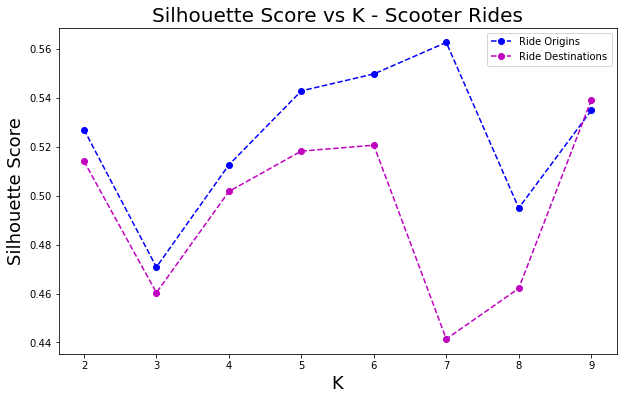

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
silhouette_plot(ax, sil_scores, 'b', 'Ride Origins', 
                    'Silhouette Score vs K - Scooter Rides')
silhouette_plot(ax, end_sil_scores, 'm', 'Ride Destinations', 
                    'Silhouette Score vs K - Scooter Rides')
plt.savefig('../images/origin_dest_sil_plot.svg', transparent=False, bbox_inches='tight', format='svg', dpi=1200)


In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(range(2,10), end_sil_scores, 'o--', c = 'g')
ax.set_xlabel('K')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score vs K - Destination Locations');

In [ ]:
def get_silhouette_score(nclust):
    km = KMeans(n_clusters = nclust, 
                init = 'random', 
                n_init = 10, 
                max_iter = 100, 
                n_jobs = -1)
    km.fit(start_location_array)
    sil_avg = silhouette_score(start_location_array, km.labels_)
    return sil_avg

sil_scores = [get_silhouette_score(i) for i in range(5,16)]
sil_scores
print(get_silhouette_score(8))

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(range(5,16), sil_scores, 'o--', c = 'g')
ax.set_xlabel('K')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score vs K - Start Locations');

In [3]:
from scipy.spatial.distance import pdist       # pair-wise distances
from scipy.spatial.distance import squareform  # dist. vector to square dist. matrix
from scipy.cluster.hierarchy import linkage    # how to define distances between clusters
from scipy.cluster.hierarchy import dendrogram # display a dendrogram 


In [19]:
def hierarchical_cluster_model(dist_metric, link_method, array):
    distmetric = dist_metric
    linkmethod = link_method
    dist = pdist(array, metric=distmetric)
    clust = linkage(dist, method=linkmethod)
    return clust

def dendrogram_plot(cluster, ax, level_num, trunc_mode, color_thresh, title):
    dendrogram(cluster, ax=ax, p=level_num, truncate_mode=trunc_mode,
                color_threshold=color_thresh)
    plt.xticks(fontsize=12)
    plt.title(title, fontsize=24)

In [10]:
distmetric = 'euclidean' # 'euclidean','cityblock','cosine','hamming' are some options

# Set linkage method
# see scipy.cluster.hierarchy.linkage for options
linkmethod = 'complete' # 'single', 'complete', 'average' are some options 

# Where would you like the clusters set?  In units of the dissimilarity metric.
thresh = 3

# Find distances using pair-wise distances in the array, according to desired metric
#dist = squareform(pdist(X, metric = distmetric))  # old way, required squareform
dist = pdist(start_location_array, metric = distmetric) # new way
dist.shape

(1682493036,)

In [11]:

# Deltermine clusters based on distances and linkage method
clust = linkage(dist, method=linkmethod)
clust

array([[0.00000000e+00, 4.00000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 5.80100000e+04, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.16007000e+05, 1.16010000e+05, 1.09632095e-01, 3.10500000e+04],
       [1.16013000e+05, 1.16014000e+05, 1.42036522e-01, 5.08050000e+04],
       [1.16012000e+05, 1.16015000e+05, 1.92096603e-01, 5.80090000e+04]])

In [ ]:
clust.shape

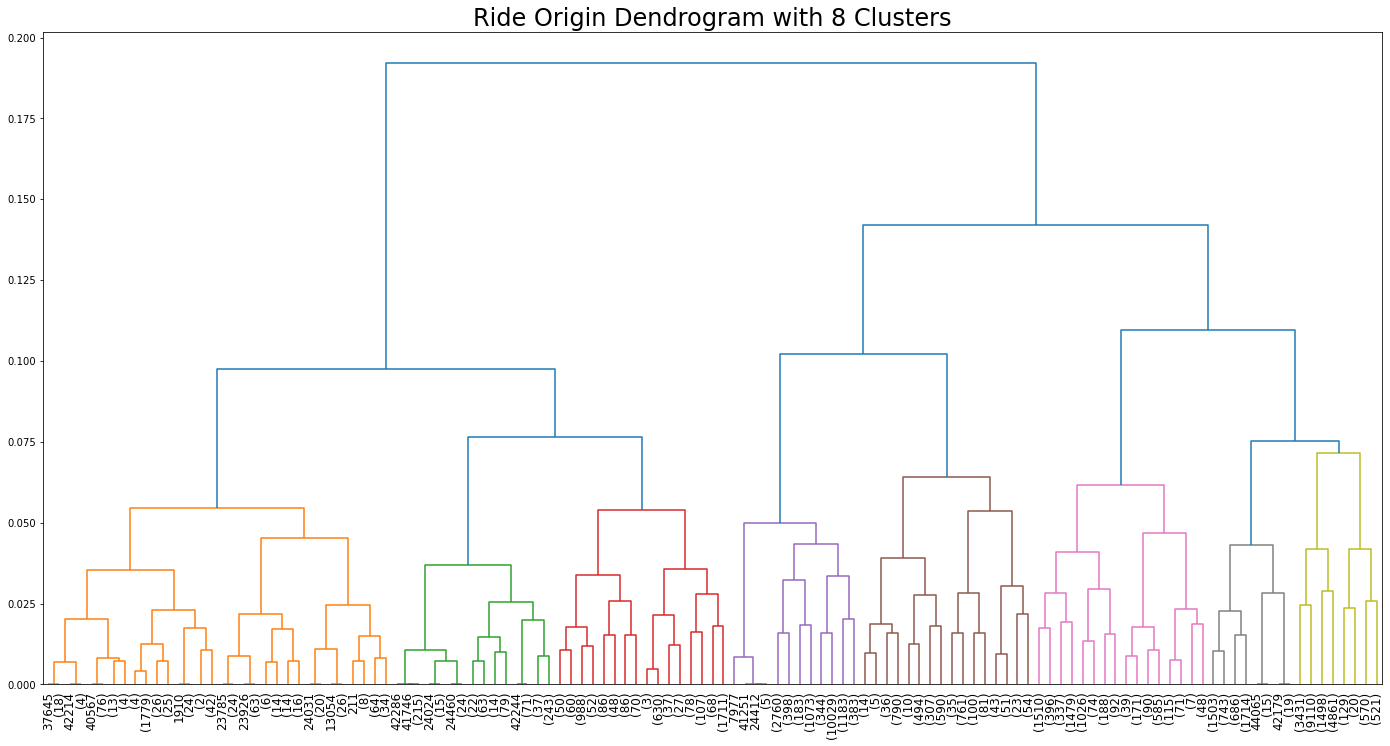

In [31]:
fig, ax = plt.subplots(figsize=(24, 12))
dendrogram(clust, ax=ax, p=6, truncate_mode='level', color_threshold=0.074) #color threshold number sets the color change
plt.xticks(fontsize=12)
plt.title('Ride Origin Dendrogram with 8 Clusters', fontsize = 24);
plt.savefig('../images/origin_dendrogram.svg', transparent=False, bbox_inches='tight', format='svg', dpi=1200)

In [13]:
dest_hier_clust = hierarchical_cluster_model('euclidean', 'complete', end_location_array)

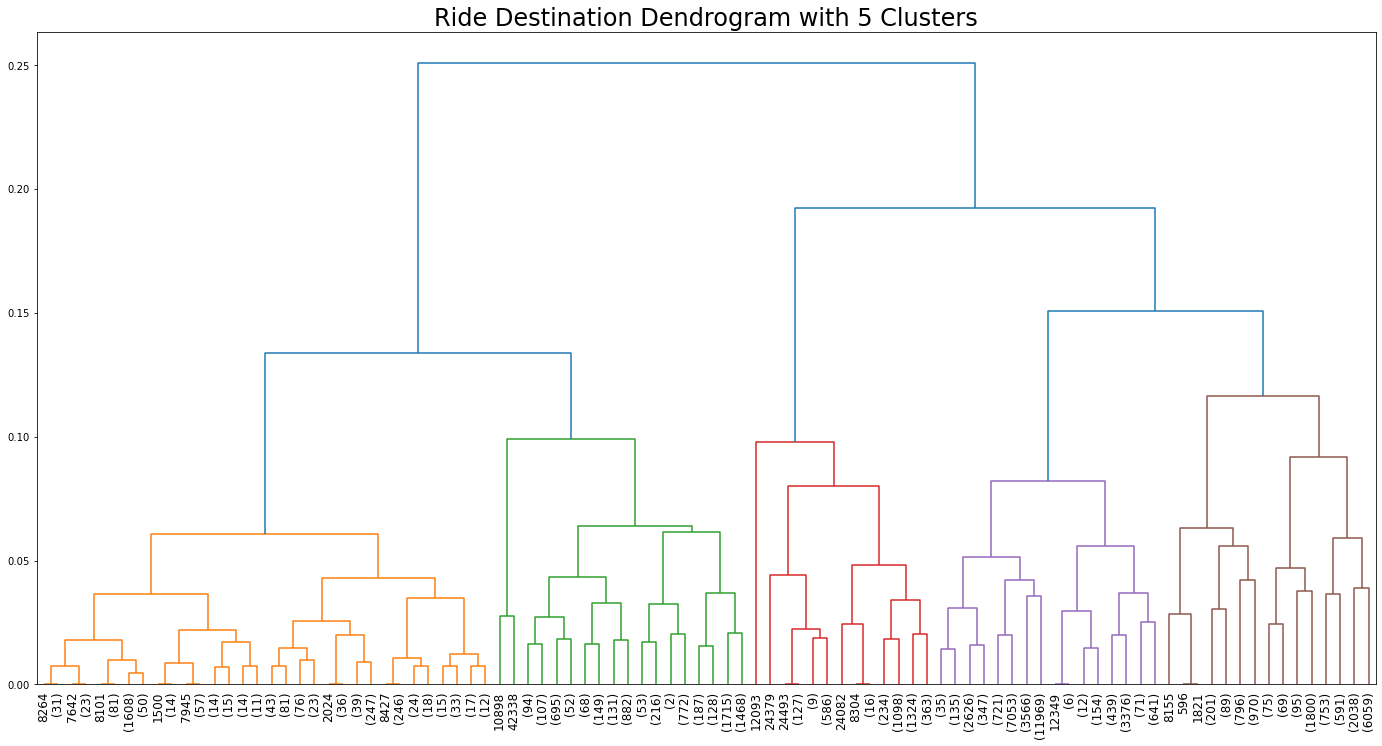

In [30]:
fig, ax = plt.subplots(figsize=(24, 12))
dendrogram_plot(dest_hier_clust, ax, 6, 'level', 0.12, 'Ride Destination Dendrogram with 5 Clusters')
plt.savefig('../images/dest_dendrogram.svg', transparent=False, bbox_inches='tight', format='svg', dpi=1200)


In [ ]:
def coord_location_array(df, lat_col, long_col):
    location_lst = df[[lat_col, long_col]]
    array = location_lst.to_numpy()
    return array

def kmeans_model(array, n_clust=8):
    kmeans = KMeans(n_clusters=n_clust)
    kmeans.fit(array)
    return kmeans


In [ ]:
origin_array = coord_location_array(scooter_june_pride, 
                    'Start_Centroid_Latitude', 'Start_Centroid_Longitude')
destination_array = coord_location_array(scooter_june_pride,
                        'End_Centroid_Latitude', 'End_Centroid_Longitude')

origin_kmeans = kmeans_model(origin_array)
print('cluster centers:{}'.format(origin_kmeans.cluster_centers_)) 
dest_kmeans = kmeans_model(destination_array)
print('cluster centers:{}'.format(dest_kmeans.cluster_centers_))

In [ ]:
origin_array.shape

In [ ]:
def get_silhouette_score(nclust, array):
    kmeans = KMeans(n_clusters = nclust, 
                init = 'random', 
                n_init = 10, 
                max_iter = 100, 
                n_jobs = -1)
    kmeans.fit(array)
    sil_avg = silhouette_score(array, kmeans.labels_)
    return sil_avg


In [ ]:
origin_sil_scores = [get_silhouette_score(i, origin_array) for i in range(2,10)]


In [ ]:
origin_sil_scores

In [ ]:
dest_sil_scores = [get_silhouette_score(i, destination_array) for i in range(2,10)]
dest_sil_scores

In [ ]:
def silhouette_plot(ax, sil_score_lst, color, label, title):
    ax.plot(range(2,10), sil_score_lst, 'o--', c = color, label=label)
    ax.set_xlabel('K', fontsize=18)
    ax.set_ylabel('Silhouette Score', fontsize=18)
    ax.set_title(title, fontsize=20)
    ax.legend()
    
def image_file(file):
    return plt.savefig(file, transparent=False, bbox_inches='tight', format='svg', dpi=1200)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
silhouette_plot(ax, origin_sil_scores, 'b', 'Ride Origins', 
                    'Silhouette Score vs K - Scooter Rides')
silhouette_plot(ax, dest_sil_scores, 'm', 'Ride Destinations', 
                    'Silhouette Score vs K - Scooter Rides')

image_file('../images/origin_dest_sil_plot.svg')

In [ ]:
origin_kmeans = kmeans_model(origin_array, n_clust=8)
print('cluster centers:{}'.format(origin_kmeans.cluster_centers_)) 
dest_kmeans = kmeans_model(destination_array, n_clust=5)
print('cluster centers:{}'.format(dest_kmeans.cluster_centers_))

In [ ]:
origin_clusters = origin_kmeans.cluster_centers_
dest_clusters = dest_kmeans.cluster_centers_

In [ ]:
origin_clust_df = pd.DataFrame(data=origin_clusters, columns=['lat', 'lon'])
name = ['cluster ' + str(idx + 1) for idx in range(0, len(origin_clust_df))]
origin_clust_df['name'] = name
origin_clust_df


In [ ]:
dest_clust_df = pd.DataFrame(data=dest_clusters, columns=['lat', 'lon'])
name = ['cluster ' + str(idx + 1) for idx in range(0, len(dest_clust_df))]
dest_clust_df['name'] = name
dest_clust_df

In [ ]:
def kmeans_scatter_plot(ax, cluster_array, color, size, label, title):
    ax.scatter(cluster_array[:,0], cluster_array[:,1], s=size, color=color, label=label)
    ax.set_xlabel('Latitude', fontsize=16)
    ax.set_ylabel('Longtitude', fontsize=16)
    ax.set_title(title, fontsize=20)
    ax.legend()

In [2]:
import folium
chicago_map = folium.Map(location=[41.88955765, -87.71819668], zoom_start=11)


In [ ]:
for i, row in dest_clust_df.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['name'], color='b').add_to(chicago_map)
    

chicago_map

In [ ]:
from folium.plugins import HeatMap
heat_map = folium.FeatureGroup(name = 'heat_map')
heat_map.add_child( HeatMap( list(zip(scooter_june_pride['End_Centroid_Latitude'].values,
                                      scooter_june_pride['End_Centroid_Longitude'].values)),
                            name='End Locations',
                            max_val=float(60),
                   min_opacity=0.2,
                   radius=5.5, blur=3.5, 
                   max_zoom=1, 
                 ))
chicago_map.add_child(heat_map)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
kmeans_scatter_plot(ax, origin_clusters, 'b', 75, 'Cluster Centers', 
                    'Ride Origins & K-Means Model Cluster Centers')
kmeans_scatter_plot(ax, origin_array, 'grey', 8, 'Rider Origins', 
                    'Ride Origins & K-Means Model Cluster Centers')


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
kmeans_scatter_plot(ax, dest_clusters, 'm', 75, 'Cluster Centers', 
                    'Ride Destinations & K-Means Model Cluster Centers')
kmeans_scatter_plot(ax, destination_array, 'grey', 8, 'Rider Destinations', 
                    'Ride Destinations & K-Means Model Cluster Centers')